In [1]:
import numpy as np
gauges_y = np.linspace(4985*1000,5000*1000,num = 10)
gauges_x = np.linspace(2485*1000,2500*1000,num = 5)
gauge_points = np.zeros((1,3))
# gauge_points = np.append(gauge_points,[[1,2,3]],axis = 0)
# print(gauge_points)
# print(gauge_points.shape)
    
gauge_num=1
for iy in range(len(gauges_y)):
    for ix in range(len(gauges_x)):
        gauge_points = np.append(gauge_points,[[gauge_num, gauges_x[ix], gauges_y[iy]]],axis=0)
        gauge_num+=1

gauge_points = np.delete(gauge_points,0,0)
print(gauge_points)

[[1.00000000e+00 2.48500000e+06 4.98500000e+06]
 [2.00000000e+00 2.48875000e+06 4.98500000e+06]
 [3.00000000e+00 2.49250000e+06 4.98500000e+06]
 [4.00000000e+00 2.49625000e+06 4.98500000e+06]
 [5.00000000e+00 2.50000000e+06 4.98500000e+06]
 [6.00000000e+00 2.48500000e+06 4.98666667e+06]
 [7.00000000e+00 2.48875000e+06 4.98666667e+06]
 [8.00000000e+00 2.49250000e+06 4.98666667e+06]
 [9.00000000e+00 2.49625000e+06 4.98666667e+06]
 [1.00000000e+01 2.50000000e+06 4.98666667e+06]
 [1.10000000e+01 2.48500000e+06 4.98833333e+06]
 [1.20000000e+01 2.48875000e+06 4.98833333e+06]
 [1.30000000e+01 2.49250000e+06 4.98833333e+06]
 [1.40000000e+01 2.49625000e+06 4.98833333e+06]
 [1.50000000e+01 2.50000000e+06 4.98833333e+06]
 [1.60000000e+01 2.48500000e+06 4.99000000e+06]
 [1.70000000e+01 2.48875000e+06 4.99000000e+06]
 [1.80000000e+01 2.49250000e+06 4.99000000e+06]
 [1.90000000e+01 2.49625000e+06 4.99000000e+06]
 [2.00000000e+01 2.50000000e+06 4.99000000e+06]
 [2.10000000e+01 2.48500000e+06 4.991666

In [10]:
import numpy as np
gauge_points = np.array([[(5000-30)*1000+15700,(5000-30)*1000+16300,(5000-30)*1000+19800,(5000-30)*1000+24300,(5000-30)*1000+29800,(5000-30)*1000+18000,(5000-30)*1000+24300,(5000-30)*1000+24300],
                         [2492.5*1000,2492.5*1000,2492.5*1000,2492.5*1000,2492.5*1000,2492.5*1000,2500*1000,(2500-1.5)*1000]])

gauge_points = np.transpose(gauge_points)
gauge_points = np.flip(gauge_points,1)

# print(gauge_points)
for row in range(len(gauge_points)):
            print(int(row+1), gauge_points[row,0], gauge_points[row,1])

1 2492500.0 4985700.0
2 2492500.0 4986300.0
3 2492500.0 4989800.0
4 2492500.0 4994300.0
5 2492500.0 4999800.0
6 2492500.0 4988000.0
7 2500000.0 4994300.0
8 2498500.0 4994300.0


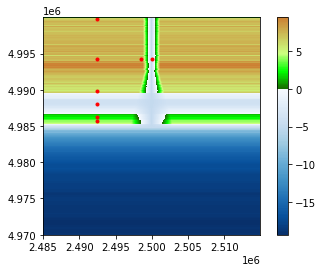

In [6]:
# Plotting the fine resolution
# Here I plot the file

import numpy
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from clawpack.visclaw import plottools
import clawpack.visclaw.colormaps as colormaps
import clawpack.geoclaw.topotools as tt

syn_file_dir = '/home/jovyan/data/topo_files_output/'
path = os.path.join(syn_file_dir, 'Mel_s_b_27_m.txt' )

# Load topography
topo = tt.Topography(path, topo_type=3)
# topo = topo.crop(filter_region=None, coarsen=100)

# Plot settings
data_break = 0.0
topo_extent = (numpy.min(topo.Z), numpy.max(topo.Z))
region_extent = topo.extent

# Make colormap
land_cmap = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                                 0.25:[0.0,1.0,0.0],
                                                  0.5:[0.8,1.0,0.5],
                                                  1.0:[0.8,0.5,0.2]})
sea_cmap = plt.get_cmap('Blues_r')
cmap, norm = colormaps.add_colormaps((land_cmap, sea_cmap), 
                                     data_limits=topo_extent,
                                     data_break=data_break)

# Plot topo
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
plot = plottools.pcolorcells(topo.X, topo.Y, topo.Z, axes=axes, norm=norm, cmap=cmap)
cbar = plt.colorbar(plot, ax=axes)

# expand extent to include full cells, which are centered at X,Y:
x1 = topo.x.min() - topo.delta[0]/2.
x2 = topo.x.max() + topo.delta[0]/2.
y1 = topo.y.min() - topo.delta[1]/2.
y2 = topo.y.max() + topo.delta[1]/2.

axes.set_xlim(x1,x2)
axes.set_ylim(y1,y2)

# Set aspect
mean_coord = 0.5 * (region_extent[3] + region_extent[2])
# axes.set_aspect(1.0 / numpy.cos(numpy.pi / 180.0 * mean_lat))
axes.set_aspect('equal')

# plt.plot(gauge_points[:,1],gauge_points[:,2],'r.')
plt.plot(gauge_points[:,0],gauge_points[:,1],'r.')

plt.show()
#plt.savefig(os.path.join(syn_file_dir, 'Melbourne_FL_m.png')) 

In [ ]:

# Plot settings
data_break = 0.0
topo_extent = (numpy.min(topo.Z), numpy.max(topo.Z))
region_extent = topo.extent

# Make colormap
land_cmap = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                                 0.25:[0.0,1.0,0.0],
                                                  0.5:[0.8,1.0,0.5],
                                                  1.0:[0.8,0.5,0.2]})
sea_cmap = plt.get_cmap('Blues_r')
cmap, norm = colormaps.add_colormaps((land_cmap, sea_cmap), 
                                     data_limits=topo_extent,
                                     data_break=data_break)

# Plot topo
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
plot = plottools.pcolorcells(topo.X, topo.Y, topo.Z, axes=axes, norm=norm, cmap=cmap)
cbar = plt.colorbar(plot, ax=axes)

# expand extent to include full cells, which are centered at X,Y:
x1 = topo.x.min() - topo.delta[0]/2.
x2 = topo.x.max() + topo.delta[0]/2.
y1 = topo.y.min() - topo.delta[1]/2.
y2 = topo.y.max() + topo.delta[1]/2.

axes.set_xlim(x1,x2)
axes.set_ylim(y1,y2)

# Set aspect
mean_coord = 0.5 * (region_extent[3] + region_extent[2])
# axes.set_aspect(1.0 / numpy.cos(numpy.pi / 180.0 * mean_lat))
axes.set_aspect('equal')

# plt.plot(gauge_points[:,1],gauge_points[:,2],'r.')
plt.plot(gauge_points[:,0],gauge_points[:,1],'r.')

plt.show()

In [ ]:
import numpy as np
np.linspace(1,50).astype(int)